<a href="https://colab.research.google.com/github/jpedrou/CensusML/blob/main/Census_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing / Importing Libraries

In [ ]:
# Pycaret
!pip install pycaret
!pip install pycaret[models]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from pycaret.classification import *

# Census Dataset
- **Goal:** Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.
-The metric chose to evaluate the models performance was **Accuracy**

For more details of data you can access this link: https://archive.ics.uci.edu/ml/datasets/adult

In [ ]:
df = pd.read_csv('census-base.csv')
df

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Data Exploration

In [ ]:
df.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

## Data Visualization

In [ ]:
np.unique(df['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

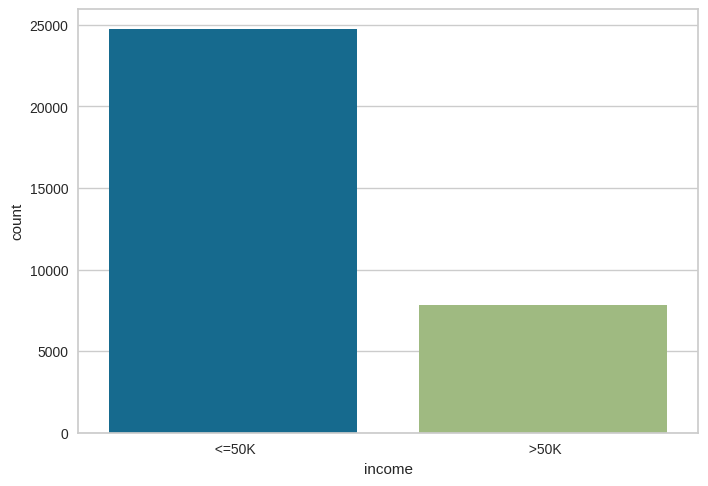

In [ ]:
sns.countplot(x=df['income']);

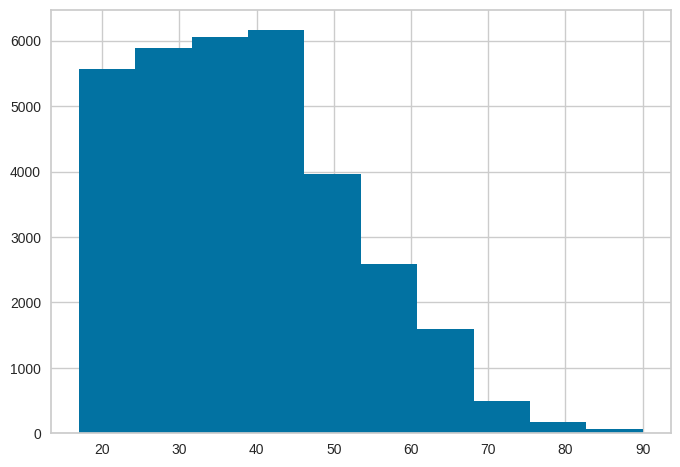

In [ ]:
plt.hist(x=df['age']);

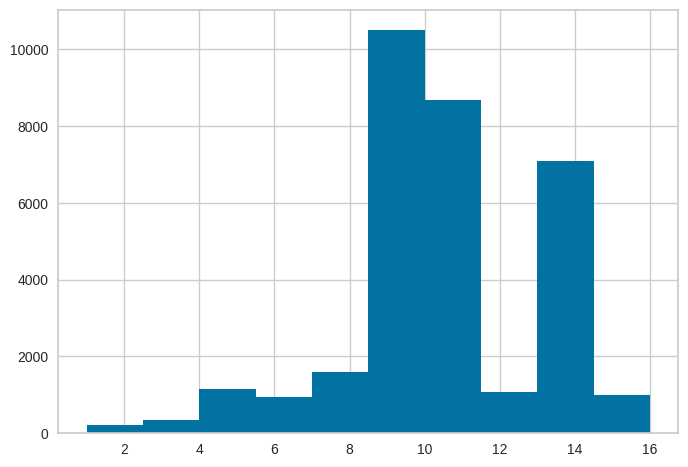

In [ ]:
plt.hist(x=df['education-num']);

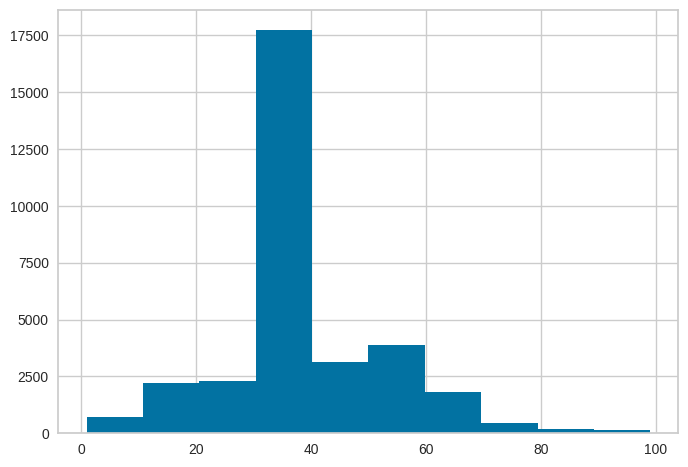

In [ ]:
plt.hist(x = df['hour-per-week']);

In [ ]:
graphic = px.treemap(df, path=['workclass', 'age'])
graphic.show()

In [ ]:
graphic = px.treemap(df, path=['occupation', 'relationship', 'age'])
graphic.show()

In [ ]:
graphic = px.parallel_categories(df, dimensions=['occupation', 'relationship'])
graphic.show()

In [ ]:
graphic = px.parallel_categories(df, dimensions=['workclass', 'occupation', 'income'])
graphic.show()

In [ ]:
graphic = px.parallel_categories(df, dimensions=['education','income'])
graphic.show()

## Predictors / Class

In [ ]:
df.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
X = df.iloc[:, 0:14].values #  transform to np.array
X

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
y = df.iloc[:, 14].values # transform to np.array
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## Categorical Features

### LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
X[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
X[:,1] = le.fit_transform(X[:,1])
X[:,3] = le.fit_transform(X[:,3])
X[:,5] = le.fit_transform(X[:,5])
X[:,6] = le.fit_transform(X[:,6])
X[:,7] = le.fit_transform(X[:,7])
X[:,8] = le.fit_transform(X[:,8])
X[:,9] = le.fit_transform(X[:,9])
X[:,13] = le.fit_transform(X[:,13])

X

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [ ]:
X[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

### OneHotEncoder

In [ ]:
onehot = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])],remainder='passthrough')
X = onehot.fit_transform(X).toarray()

In [ ]:
X

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [ ]:
X[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
X.shape

(32561, 108)

## Train / Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
X_train.shape, y_train.shape

((26048, 108), (26048,))

In [ ]:
X_test.shape, y_test.shape

((6513, 108), (6513,))

### Saving Preprocessed Datas

In [ ]:
with open('census-preprocessed.pkl', 'wb') as f:
    pickle.dump([X_train, y_train, X_test, y_test], f)

# DecisionTreeClassifier
- Default Model
- Without find the best parameters
- No Scaling

I used this model like this to see how good it would be without looking for the best configs. I could use RandomForestClassifier that is a DecisionTreeModel with better updates, but I chose the good and old DecisionTree.

## Importing Datasets

In [ ]:
with open('census-preprocessed.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

In [ ]:
X_train.shape, y_train.shape

((26048, 108), (26048,))

In [ ]:
X_test.shape, y_test.shape

((6513, 108), (6513,))

## Model


In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)

predictions

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print('')
print(classification_report(y_test, predictions))

Accuracy: 0.8082296944572394

              precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87      4918
        >50K       0.61      0.61      0.61      1595

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513



0.8082296944572394

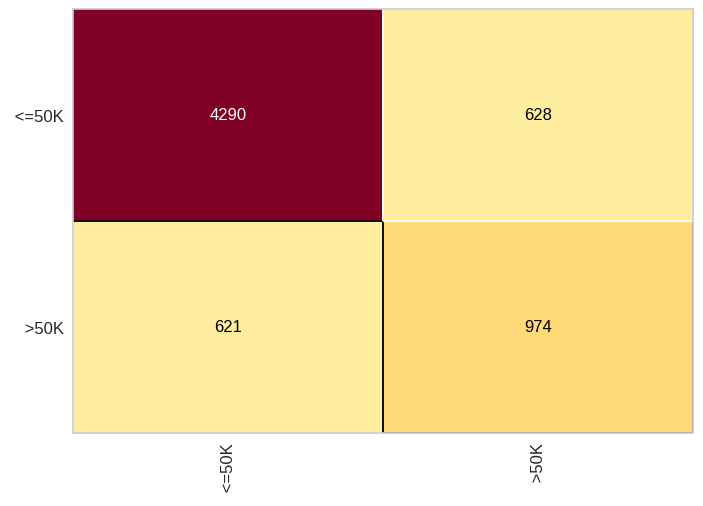

In [ ]:
cm = ConfusionMatrix(dt)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

# DecisionTree With LDA
Same model used above, but with a dimensionality reduction technique.
- **LDA; totally dependent of the class(es)**

In [ ]:
X_train.shape, y_train.shape

((26048, 108), (26048,))

In [ ]:
X_test.shape, y_test.shape

((6513, 108), (6513,))

In [ ]:
lda = LinearDiscriminantAnalysis(n_components = 1) # Not bigger than the features either bigger than n_classes - 1
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.fit_transform(X_test, y_test)

In [ ]:
X_train_lda.shape, X_test_lda.shape

((26048, 1), (6513, 1))

In [ ]:
dt_lda = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
dt_lda.fit(X_train_lda, y_train)
predictions = dt_lda.predict(X_test_lda)

print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print('')
print(classification_report(y_test, predictions))

Accuracy: 0.7836634423460771

              precision    recall  f1-score   support

       <=50K       0.85      0.86      0.86      4918
        >50K       0.56      0.54      0.55      1595

    accuracy                           0.78      6513
   macro avg       0.71      0.70      0.70      6513
weighted avg       0.78      0.78      0.78      6513



0.7836634423460771

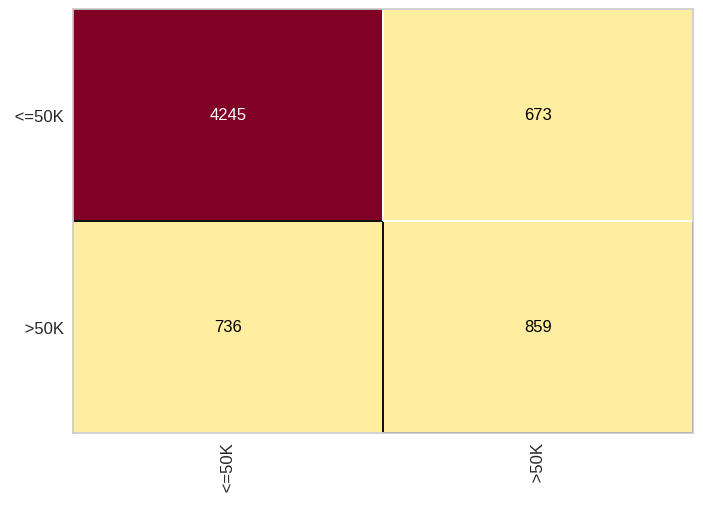

In [ ]:
cm = ConfusionMatrix(dt_lda)
cm.fit(X_train_lda, y_train)
cm.score(X_test_lda, y_test)

# DecisionTree With Features Selection
In this experience I tried to improve the model selecting the best attributes using the **Low Variance** method. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

In [ ]:
df2 = df.copy()
df2

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
cols = df2.columns[:-1]
cols

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [ ]:
X_census = df2.iloc[:,:-1].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
y_census = df2.iloc[:,14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
X_census[:,1] = le.fit_transform(X_census[:,1])
X_census[:,3] = le.fit_transform(X_census[:,3])
X_census[:,5] = le.fit_transform(X_census[:,5])
X_census[:,6] = le.fit_transform(X_census[:,6])
X_census[:,7] = le.fit_transform(X_census[:,7])
X_census[:,8] = le.fit_transform(X_census[:,8])
X_census[:,9] = le.fit_transform(X_census[:,9])
X_census[:,13] = le.fit_transform(X_census[:,13])

X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

## Scaling of Values

In [ ]:
scaler = MinMaxScaler()

X_census_scaler = scaler.fit_transform(X_census)
X_census_scaler

array([[0.30136986, 0.875     , 0.0443019 , ..., 0.        , 0.39795918,
        0.95121951],
       [0.45205479, 0.75      , 0.0482376 , ..., 0.        , 0.12244898,
        0.95121951],
       [0.28767123, 0.5       , 0.13811345, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.56164384, 0.5       , 0.09482688, ..., 0.        , 0.39795918,
        0.95121951],
       [0.06849315, 0.5       , 0.12849934, ..., 0.        , 0.19387755,
        0.95121951],
       [0.47945205, 0.625     , 0.18720338, ..., 0.        , 0.39795918,
        0.95121951]])

## Low Variance

In [ ]:
for i in range(X_census.shape[1]):
    print(X_census_scaler[:, i].var())

0.034913808595952486
0.03312115190663569
0.005138537590667898
0.06657103564450892
0.029416385024073417
0.06301761677301636
0.09123816653931152
0.10326534394406342
0.04502805169292987
0.22136950173699113
0.00545419549240862
0.008557270623428908
0.015874043397822807
0.03641266114220053


In [ ]:
selection = VarianceThreshold(threshold = 0.045)
X_census_var = selection.fit_transform(X_census_scaler)

X_census_var.shape

(32561, 6)

In [ ]:
X_census_var

array([[0.6       , 0.66666667, 0.07142857, 0.2       , 1.        ,
        1.        ],
       [0.6       , 0.33333333, 0.28571429, 0.        , 1.        ,
        1.        ],
       [0.73333333, 0.        , 0.42857143, 0.2       , 1.        ,
        1.        ],
       ...,
       [0.73333333, 1.        , 0.07142857, 0.8       , 1.        ,
        0.        ],
       [0.73333333, 0.66666667, 0.07142857, 0.6       , 1.        ,
        1.        ],
       [0.73333333, 0.33333333, 0.28571429, 1.        , 1.        ,
        0.        ]])

In [ ]:
selection.variances_

array([0.03491381, 0.03312115, 0.00513854, 0.06657104, 0.02941639,
       0.06301762, 0.09123817, 0.10326534, 0.04502805, 0.2213695 ,
       0.0054542 , 0.00855727, 0.01587404, 0.03641266])

## Main Features

In [ ]:
inds = np.where(selection.variances_ > 0.045)
inds

(array([3, 5, 6, 7, 8, 9]),)

In [ ]:
cols[inds]

Index(['education', 'marital-status', 'occupation', 'relationship', 'race',
       'sex'],
      dtype='object')

In [ ]:
cols

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

## New data

In [ ]:
df_low = df2.drop(['age', 'workclass', 'final-weight','education-num','capital-gain', 'capital-loos',
                   'hour-per-week', 'native-country'], axis=1)

df_low

,education,marital-status,occupation,relationship,race,sex,income
0,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K
1,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K
2,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<=50K
4,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,<=50K
...,...,...,...,...,...,...,...
32556,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,<=50K
32557,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,>50K
32558,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,<=50K
32559,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,<=50K


### Predictors / Class

In [ ]:
X_var = df_low.iloc[:,:-1].values
y_var = df_low.iloc[:, 6].values

In [ ]:
X_var

array([[' Bachelors', ' Never-married', ' Adm-clerical',
        ' Not-in-family', ' White', ' Male'],
       [' Bachelors', ' Married-civ-spouse', ' Exec-managerial',
        ' Husband', ' White', ' Male'],
       [' HS-grad', ' Divorced', ' Handlers-cleaners', ' Not-in-family',
        ' White', ' Male'],
       ...,
       [' HS-grad', ' Widowed', ' Adm-clerical', ' Unmarried', ' White',
        ' Female'],
       [' HS-grad', ' Never-married', ' Adm-clerical', ' Own-child',
        ' White', ' Male'],
       [' HS-grad', ' Married-civ-spouse', ' Exec-managerial', ' Wife',
        ' White', ' Female']], dtype=object)

In [ ]:
y_var

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

### LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
X_var[:,0] = le.fit_transform(X_var[:,0])
X_var[:,1] = le.fit_transform(X_var[:,1])
X_var[:,2] = le.fit_transform(X_var[:,2])
X_var[:,3] = le.fit_transform(X_var[:,3])
X_var[:,4] = le.fit_transform(X_var[:,4])
X_var[:,5] = le.fit_transform(X_var[:,5])

X_var

array([[9, 4, 1, 1, 4, 1],
       [9, 2, 4, 0, 4, 1],
       [11, 0, 6, 1, 4, 1],
       ...,
       [11, 6, 1, 4, 4, 0],
       [11, 4, 1, 3, 4, 1],
       [11, 2, 4, 5, 4, 0]], dtype=object)

## OneHotEncoder

In [ ]:
onehot = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1,2,3,4,5])],remainder='passthrough')
X_var = onehot.fit_transform(X_var).toarray()

In [ ]:
X_var

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

## Train / Test Split

In [ ]:
X_var_train, X_var_test, y_var_train, y_var_test = train_test_split(X_var,y_var,test_size=0.2, random_state=0)

In [ ]:
X_var_train.shape, X_var_test.shape

((26048, 51), (6513, 51))

## Model

In [ ]:
dt_var = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_var.fit(X_var_train,y_var_train)

preds = dt_var.predict(X_var_test)

print(f'Accuracy: {accuracy_score(y_var_test, preds)}')
print('')
print(classification_report(y_var_test, preds))

Accuracy: 0.8157531091662829

              precision    recall  f1-score   support

       <=50K       0.85      0.91      0.88      4918
        >50K       0.66      0.52      0.58      1595

    accuracy                           0.82      6513
   macro avg       0.76      0.72      0.73      6513
weighted avg       0.81      0.82      0.81      6513



# Pycaret Section
It's a Python AutoML library, which is very used to find the base model to not lose much time finding manually the ideal model. I just passed the default parameters and already had an awesome result.

In [ ]:
df_pycaret = df.copy()

In [ ]:
train_proportion = 0.8
train_index = int(len(df_pycaret)*train_proportion)

In [ ]:
df_pycaret_train = df_pycaret[:train_index]
df_pycaret_test = df_pycaret[train_index:]

In [ ]:
df_pycaret_train

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,42,Private,134220,Assoc-voc,11,Divorced,Exec-managerial,Own-child,Amer-Indian-Eskimo,Female,0,0,40,United-States,<=50K
26044,42,Private,177989,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
26045,32,Private,164190,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,30,United-States,<=50K
26046,36,Private,90897,Assoc-acdm,12,Never-married,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [ ]:
df_pycaret_test

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
26048,30,Private,270886,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K
26049,21,Private,216129,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,35,United-States,<=50K
26050,33,Private,189368,Some-college,10,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States,>50K
26051,19,?,141418,Some-college,10,Never-married,?,Own-child,White,Male,0,0,15,United-States,<=50K
26052,19,Private,306225,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
classification = setup(df_pycaret_train, target='income', session_id=0)

,Description,Value
0,Session id,0
1,Target,income
2,Target type,Binary
3,Target mapping,"<=50K: 0, >50K: 1"
4,Original data shape,"(26048, 15)"
5,Transformed data shape,"(26048, 67)"
6,Transformed train set shape,"(18233, 67)"
7,Transformed test set shape,"(7815, 67)"
8,Ordinal features,1
9,Numeric features,6


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8697,0.9255,0.6452,0.7738,0.7033,0.6208,0.6252,11.7120
lightgbm,Light Gradient Boosting Machine,0.8692,0.9242,0.6514,0.7680,0.7044,0.6212,0.6250,0.9670
xgboost,Extreme Gradient Boosting,0.8662,0.9217,0.6480,0.7591,0.6986,0.6134,0.6169,5.9470
gbc,Gradient Boosting Classifier,0.8621,0.9187,0.5997,0.7744,0.6753,0.5897,0.5978,3.6600
ada,Ada Boost Classifier,0.8573,0.9129,0.6116,0.7479,0.6724,0.5825,0.5876,1.6970
rf,Random Forest Classifier,0.8539,0.9013,0.6216,0.7295,0.6709,0.5779,0.5812,3.4680
lda,Linear Discriminant Analysis,0.8403,0.8911,0.5582,0.7133,0.6261,0.5265,0.5331,1.0340
ridge,Ridge Classifier,0.8380,0.0000,0.4944,0.7443,0.5938,0.4978,0.5142,0.7920
et,Extra Trees Classifier,0.8306,0.8752,0.5949,0.6643,0.6273,0.5182,0.5198,3.4600
dt,Decision Tree Classifier,0.8112,0.7438,0.6146,0.6047,0.6094,0.4849,0.4851,0.8530


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

## Model

In [ ]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8635,0.9245,0.6590,0.7423,0.6982,0.6104,0.6122
1,0.8799,0.9375,0.6407,0.8187,0.7189,0.6440,0.6518
2,0.8723,0.9334,0.6590,0.7742,0.7120,0.6306,0.6340
3,0.8678,0.9196,0.6147,0.7859,0.6898,0.6074,0.6148
4,0.8673,0.9209,0.6499,0.7614,0.7012,0.6166,0.6198
5,0.8568,0.9095,0.5927,0.7573,0.6650,0.5756,0.5826
6,0.8683,0.9292,0.6476,0.7669,0.7022,0.6185,0.6221
7,0.8782,0.9282,0.6796,0.7836,0.7279,0.6500,0.6527
8,0.8667,0.9225,0.6339,0.7694,0.6951,0.6108,0.6155


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8701,0.9227,0.6522,0.7703,0.7063,0.6236,0.6272
1,0.8745,0.9361,0.6087,0.8210,0.6991,0.6220,0.6331
2,0.8701,0.9337,0.6362,0.7809,0.7011,0.6192,0.6245
3,0.8612,0.9158,0.5826,0.7815,0.6675,0.5822,0.5922
4,0.8640,0.9169,0.6224,0.7662,0.6869,0.6012,0.6065
5,0.8552,0.9055,0.5606,0.7729,0.6499,0.5615,0.5730
6,0.8656,0.9260,0.6362,0.7637,0.6941,0.6089,0.6131
7,0.8749,0.9296,0.6545,0.7879,0.7150,0.6358,0.6403
8,0.8678,0.9211,0.6087,0.7917,0.6882,0.6062,0.6146


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
final_catboost = finalize_model(catboost)

## Plots

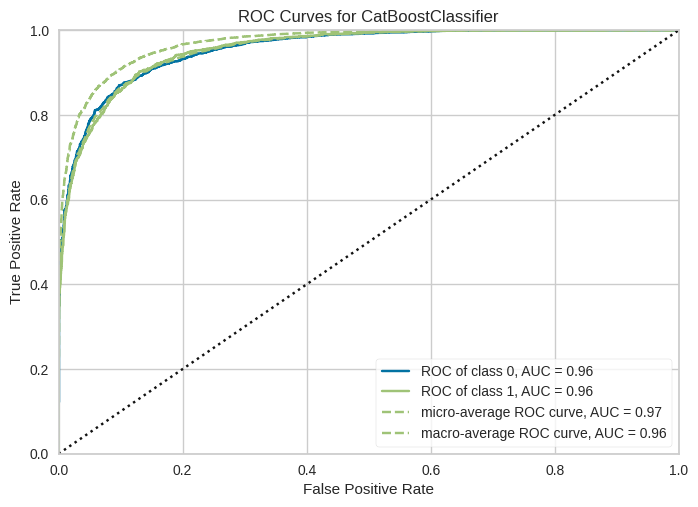

In [ ]:
plot_model(final_catboost)

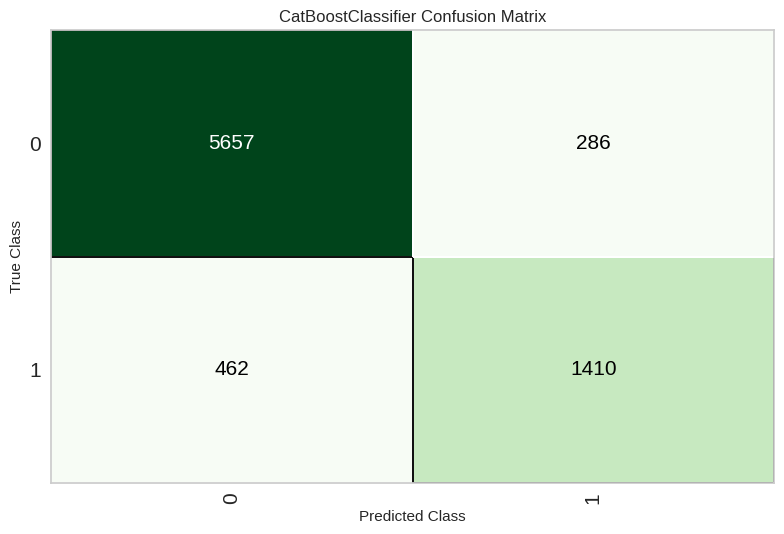

In [ ]:
plot_model(final_catboost, plot='confusion_matrix')

## Predictions

In [ ]:
predict_model(final_catboost, df_pycaret_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8746,0.9301,0.6625,0.7928,0.7218,0.6417,0.6460


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,prediction_label,prediction_score
26048,30,Private,270886,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0,<=50K,0.9955
26049,21,Private,216129,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,35,United-States,0,<=50K,0.9991
26050,33,Private,189368,Some-college,10,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States,1,<=50K,0.7904
26051,19,?,141418,Some-college,10,Never-married,?,Own-child,White,Male,0,0,15,United-States,0,<=50K,0.9996
26052,19,Private,306225,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States,0,<=50K,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,<=50K,0.5439
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,<=50K,0.7358
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,<=50K,0.9757
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,<=50K,0.9998


# Conclusion
The best model was with pycaret library, just with the default configs
- **CatBoostClassifier (0.8746)**

In [ ]:
models = ['DecisionTree', 'DecisionTree With LDA', 'DecisionTree With Features Selection', 'Pycaret - CatBoost']
accuracy = [0.8082, 0.7836, 0.8157, 0.8746]

results = {'Models': models,
           'Accuracy': accuracy}

In [ ]:
df_results = pd.DataFrame(results)
df_results.sort_values('Accuracy', ascending=False)

,Models,Accuracy
3,Pycaret - CatBoost,0.8746
2,DecisionTree With Features Selection,0.8157
0,DecisionTree,0.8082
1,DecisionTree With LDA,0.7836
